In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
                                                                                      # Indeks:
mulige_varmepumper = ['Mitsubishi Electric',                    # Konstant kapasitet    0
                      'Fujitsu',                                # Konstant kapasitet    1
                      'Toshiba',                                # Konstant kapasitet    2
                      'Panasonic',                              # Konstant kapasitet    3
                      'LG',                                     # Konstant kapasitet    4
                      'IVT',                                    # Konstant kapasitet    5
                      'Mitsubishi HI',                          # Konstant kapasitet    6
                      'Samsung',                                # Konstant kapasitet    7
                      'Ultimate',                               # Konstant kapasitet    8
                      'Foma 5500 inverter',                     # Variabel kapasitet    9
                      'Fujitsu AOY9LFBC',                       # Variabel kapasitet    10
                      'Mitsubishi 35ZD-SSRC 35ZD-SA',           # Variabel kapasitet    11
                      'Sanyo SA-CRV93EHN',                      # Variabel kapasitet    12
                      'Mitsubishi El. MSZ-FA25VAH-E1',          # Variabel kapasitet    13
                      'Sanyo Sap-KRV123EH SAP-CRV',             # Variabel kapasitet    14
                      'IVT Nordic Inverter 12FR-N',             # Variabel kapasitet    15
                      'Panasonic E9EKEB',                       # Variabel kapasitet    16
                      'Sanyo SAP-KRV124EHDXN',                  # Variabel kapasitet    17
                      'Electrolux Oxy3heatpumpESD12HRA',        # Variabel kapasitet    18
                      'Electrolux Oxy3heatpumpESD09HRA',        # Variabel kapasitet    19
                      'IVT Nordic Inverter 12 GR-N',            # Variabel kapasitet    20
                      'Mitsubishi M.H.I.SRKSRC-25ZFXSA']        # Variabel kapasitet    21


# ENDRE KUN DETTE_________________________________________________________________________________________________________________________________________________________
# Indeksen til valgt varmepumpe i listen over.
VARMEPUMPE_NR = 21

# Excel-fil med timesoppløst utetemperatur og varmeeffektbehov (kW) i hhv. C- og D-kolonnen: (Evt. endre på koden i neste blokk hvis filformatet avviker)
behovsfilnavn = 'varmebehov_og_utetemp.xlsx'
#__________________________________________________________________________________________________________________________________________________________________________

In [2]:
# Velger varmepumpe
navn_paa_varmepumpe = mulige_varmepumper[VARMEPUMPE_NR]
if VARMEPUMPE_NR >= 9:
    kap_var = True
    print(f'Varmepumpen {navn_paa_varmepumpe} har variabel kapasitet (50-100 %).')
else:
    kap_var = False
    print(f'Varmepumpen fra {navn_paa_varmepumpe} har konstant kapasitet (100 %).')


# Leser av behovsfil
behovsfil = pd.read_excel(behovsfilnavn,sheet_name='Sheet1')
utetemp = behovsfil.iloc[:,2]           # Utetemp i C-kolonnen
utetemp = np.array(utetemp)
varmebehov = behovsfil.iloc[:,3]        # Varmebehov i D-kolonnen
varmebehov = np.array(varmebehov)*1000  # Enhet kW i Excel-fil

Varmepumpen Mitsubishi M.H.I.SRKSRC-25ZFXSA har variabel kapasitet (50-100 %).


In [3]:
def fjern_nan(inn_df):
    inn_array = np.array(inn_df)
    ut_array = []
    for i in range(0,inn_array.shape[0]):
        if(inn_array[i] == inn_array[i]):
            ut_array.append(inn_array[i])
    ut_array = np.array(ut_array)
    return ut_array

vp_fil = pd.read_excel('Datablader_luft-luft_VP.xlsx',sheet_name=navn_paa_varmepumpe)

if kap_var == False:
    utetemp_cop = vp_fil.iloc[2:,0]
    utetemp_cop = fjern_nan(utetemp_cop)
    cop_data_100 = vp_fil.iloc[2:,1]
    cop_data_100 = fjern_nan(cop_data_100)
    utetemp_effekt = vp_fil.iloc[2:,3]
    utetemp_effekt = fjern_nan(utetemp_effekt)
    effekt_data_100 = vp_fil.iloc[2:,4]
    effekt_data_100 = fjern_nan(effekt_data_100)

elif kap_var == True:
    utetemp_cop = vp_fil.iloc[2:,0]
    utetemp_cop = fjern_nan(utetemp_cop)
    utetemp_effekt = vp_fil.iloc[2:,5]
    utetemp_effekt = fjern_nan(utetemp_effekt)

    cop_data_100 = vp_fil.iloc[2:,1]
    cop_data_100 = fjern_nan(cop_data_100)
    effekt_data_100 = vp_fil.iloc[2:,6]
    effekt_data_100 = fjern_nan(effekt_data_100)

    cop_data_75 = vp_fil.iloc[2:,2]
    cop_data_75 = fjern_nan(cop_data_75)
    effekt_data_75 = vp_fil.iloc[2:,7]
    effekt_data_75 = fjern_nan(effekt_data_75)

    cop_data_50 = vp_fil.iloc[2:,3]
    cop_data_50 = fjern_nan(cop_data_50)
    effekt_data_50 = vp_fil.iloc[2:,8]
    effekt_data_50 = fjern_nan(effekt_data_50)



Valgt varmepumpe: Mitsubishi M.H.I.SRKSRC-25ZFXSA


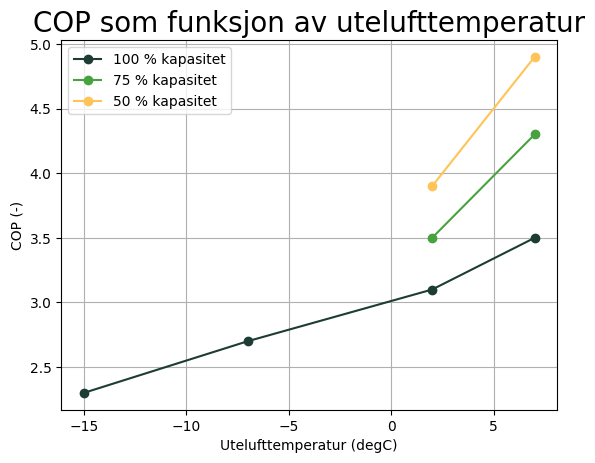

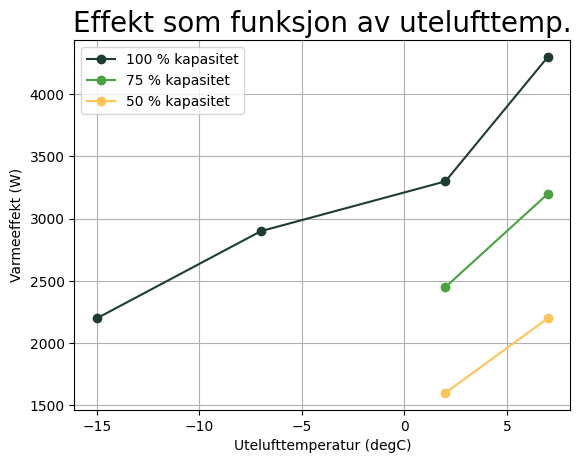

In [4]:
print('Valgt varmepumpe:',navn_paa_varmepumpe)

plt.plot(utetemp_cop,cop_data_100,color='#1d3c34',marker='o')
if kap_var == True:
    plt.plot(utetemp_cop[0:2],cop_data_75,color='#48a23f',marker='o')
    plt.plot(utetemp_cop[0:2],cop_data_50,color='#FFC358',marker='o')
    plt.legend(['100 % kapasitet','75 % kapasitet', '50 % kapasitet'])

plt.xlabel('Utelufttemperatur (degC)')
plt.ylabel('COP (-)')
plt.title('COP som funksjon av utelufttemperatur', fontsize = 20)
plt.grid()
plt.show()

plt.plot(utetemp_effekt,effekt_data_100,color='#1d3c34',marker='o')
if kap_var == True:
    plt.plot(utetemp_effekt[0:2],effekt_data_75,color='#48a23f',marker='o')
    plt.plot(utetemp_effekt[0:2],effekt_data_50,color='#FFC358',marker='o')
    plt.legend(['100 % kapasitet','75 % kapasitet', '50 % kapasitet'])

plt.xlabel('Utelufttemperatur (degC)')
plt.ylabel('Varmeeffekt (W)')
plt.title('Effekt som funksjon av utelufttemp.', fontsize = 20)
plt.grid()
plt.show()

In [5]:
def lin_int(x,x1,x2,y1,y2):
    y = y1+(x-x1)*(y2-y1)/(x2-x1)
    return y

def auto_lin_int(verdi_x,data_x,data_y,stigende_x):
    if stigende_x == False:
        if verdi_x >= data_x[0]:
            verdi_y = data_y[0]
        elif verdi_x <= data_x[-1]:
            verdi_y = data_y[-1]
        else:
            for j in range(1,len(data_x)):
                if verdi_x >= data_x[j]:
                    x1 = data_x[j-1]
                    x2 = data_x[j]
                    y1 = data_y[np.where(data_x == x1)]
                    y2 = data_y[np.where(data_x == x2)]
                    verdi_y = lin_int(verdi_x,x1,x2,y1,y2)
                    break

    elif stigende_x == True:
        if verdi_x <= data_x[0]:
            verdi_y = data_y[0]
        elif verdi_x >= data_x[-1]:
            verdi_y = data_y[-1]
        else:
            for j in range(1,len(data_x)):
                if verdi_x <= data_x[j]:
                    x1 = data_x[j-1]
                    x2 = data_x[j]
                    y1 = data_y[np.where(data_x == x1)]
                    y2 = data_y[np.where(data_x == x2)]
                    verdi_y = lin_int(verdi_x,x1,x2,y1,y2)
                    break
    return verdi_y

In [6]:
if kap_var == False:
    kap = np.ones(len(behovsfil))*100
    effekt_fra_vp = np.zeros(len(behovsfil))
    cop = np.zeros(len(behovsfil))

    for i in range(0,len(effekt_fra_vp)):
        effekt_fra_vp[i] = auto_lin_int(utetemp[i],utetemp_effekt,effekt_data_100,stigende_x=False)
    
        if varmebehov[i] < effekt_fra_vp[i]:
            effekt_fra_vp[i] = varmebehov[i]

        cop[i] = auto_lin_int(utetemp[i],utetemp_cop,cop_data_100,stigende_x=False)

elif kap_var == True:
    effekt_fra_vp = np.zeros(len(behovsfil))
    kap = np.zeros(len(behovsfil))
    snittkap = np.zeros(len(behovsfil))
    cop = np.zeros(len(behovsfil))
    vektet_cop = np.zeros(len(behovsfil))

    utetemp1 = utetemp_effekt[0]        #7 degC
    utetemp2 = utetemp_effekt[1]        #2 degC
    utetemp3 = utetemp_effekt[2]        #-7 degC
    utetemp4 = utetemp_effekt[3]        #-15 degC
    

    for i in range(0,len(effekt_fra_vp)): 
        
        if utetemp[i] >= utetemp1:
            effekt_fra_vp_100 = float(effekt_data_100[np.where(utetemp_effekt == utetemp1)])
            effekt_fra_vp_75 = float(effekt_data_75[np.where(utetemp_effekt == utetemp1)])
            effekt_fra_vp_50 = float(effekt_data_50[np.where(utetemp_effekt == utetemp1)])
            
            if varmebehov[i] < effekt_fra_vp_100:
                effekt_fra_vp[i] = varmebehov[i]
                kap[i] = auto_lin_int(varmebehov[i],np.array([effekt_fra_vp_100,effekt_fra_vp_75,effekt_fra_vp_50]),np.array([100,75,50]),stigende_x=False)
            else:
                effekt_fra_vp[i] = effekt_fra_vp_100
                kap[i] = 100


            cop_100 = float(cop_data_100[np.where(utetemp_cop == utetemp1)])
            cop_75 = float(cop_data_75[np.where(utetemp_cop == utetemp1)])
            cop_50 = float(cop_data_50[np.where(utetemp_cop == utetemp1)])
            
            cop[i] = auto_lin_int(kap[i],np.array([100,75,50]),np.array([cop_100,cop_75,cop_50]),stigende_x=False)

        
        elif utetemp[i] >= utetemp2:
            effekt_fra_vp_100 = lin_int(utetemp[i],utetemp2,utetemp1,float(effekt_data_100[np.where(utetemp_effekt == utetemp2)]),float(effekt_data_100[np.where(utetemp_effekt == utetemp1)]))
            effekt_fra_vp_75 = lin_int(utetemp[i],utetemp2,utetemp1,float(effekt_data_75[np.where(utetemp_effekt == utetemp2)]),float(effekt_data_75[np.where(utetemp_effekt == utetemp1)]))
            effekt_fra_vp_50 = lin_int(utetemp[i],utetemp2,utetemp1,float(effekt_data_50[np.where(utetemp_effekt == utetemp2)]),float(effekt_data_50[np.where(utetemp_effekt == utetemp1)]))

            if varmebehov[i] < effekt_fra_vp_100:
                effekt_fra_vp[i] = varmebehov[i]
                kap[i] = auto_lin_int(varmebehov[i],np.array([effekt_fra_vp_100,effekt_fra_vp_75,effekt_fra_vp_50]),np.array([100,75,50]),stigende_x=False)
            else:
                effekt_fra_vp[i] = effekt_fra_vp_100
                kap[i] = 100

            cop_100 = lin_int(utetemp[i],utetemp2,utetemp1,float(cop_data_100[np.where(utetemp_cop == utetemp2)]),float(cop_data_100[np.where(utetemp_cop == utetemp1)]))
            cop_75 = lin_int(utetemp[i],utetemp2,utetemp1,float(cop_data_75[np.where(utetemp_cop == utetemp2)]),float(cop_data_75[np.where(utetemp_cop == utetemp1)]))
            cop_50 = lin_int(utetemp[i],utetemp2,utetemp1,float(cop_data_50[np.where(utetemp_cop == utetemp2)]),float(cop_data_50[np.where(utetemp_cop == utetemp1)]))
            
            cop[i] = auto_lin_int(kap[i],np.array([100,75,50]),np.array([cop_100,cop_75,cop_50]),stigende_x=False)

        
        
        elif utetemp[i] >= utetemp3:
            effekt_fra_vp_100 = lin_int(utetemp[i],utetemp3,utetemp2,float(effekt_data_100[np.where(utetemp_effekt == utetemp3)]),float(effekt_data_100[np.where(utetemp_effekt == utetemp2)]))
            
            if varmebehov[i] < effekt_fra_vp_100:
                effekt_fra_vp[i] = varmebehov[i]
            else:
                effekt_fra_vp[i] = effekt_fra_vp_100

            kap[i] = 100
            cop_100 = lin_int(utetemp[i],utetemp3,utetemp2,float(cop_data_100[np.where(utetemp_cop == utetemp3)]),float(cop_data_100[np.where(utetemp_cop == utetemp2)]))
            cop[i] = cop_100

        
        elif utetemp[i] >= utetemp4:
            effekt_fra_vp_100 = lin_int(utetemp[i],utetemp4,utetemp3,float(effekt_data_100[np.where(utetemp_effekt == utetemp4)]),float(effekt_data_100[np.where(utetemp_effekt == utetemp3)]))

            if varmebehov[i] < effekt_fra_vp_100:
                effekt_fra_vp[i] = varmebehov[i]
            else:
                effekt_fra_vp[i] = effekt_fra_vp_100

            kap[i] = 100
            cop_100 = lin_int(utetemp[i],utetemp4,utetemp3,float(cop_data_100[np.where(utetemp_cop == utetemp4)]),float(cop_data_100[np.where(utetemp_cop == utetemp3)]))
            cop[i] = cop_100

        
        else:
            effekt_fra_vp_100 = float(effekt_data_100[np.where(utetemp_effekt == np.min(utetemp_effekt))])

            if varmebehov[i] < effekt_fra_vp_100:
                effekt_fra_vp[i] = varmebehov[i]
            else:
                effekt_fra_vp[i] = effekt_fra_vp_100

            kap[i] = 100
            cop[i] = float(cop_data_100[np.where(utetemp_effekt == np.min(utetemp_effekt))])

In [7]:
spisslast = varmebehov-effekt_fra_vp
for i in range(0,len(spisslast)):
    if spisslast[i] < 0:
        spisslast[i] = 0

ellast = effekt_fra_vp/cop
kildelast = effekt_fra_vp-ellast

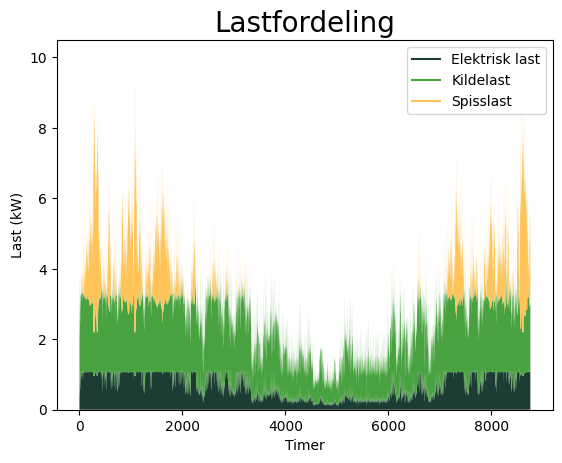

In [8]:
timer=np.linspace(1,8760,8760)

plt.plot([], [], color='#1d3c34', label ='Elektrisk last')
plt.plot([], [], color='#48a23f', label ='Kildelast')
plt.plot([], [], color='#FFC358', label ='Spisslast')

plt.stackplot(timer,ellast/1000,kildelast/1000,spisslast/1000,colors = ['#1d3c34','#48a23f','#FFC358'])
plt.xlabel('Timer')
plt.ylabel('Last (kW)')
plt.title('Lastfordeling', fontsize = 20)
plt.legend()
plt.show()

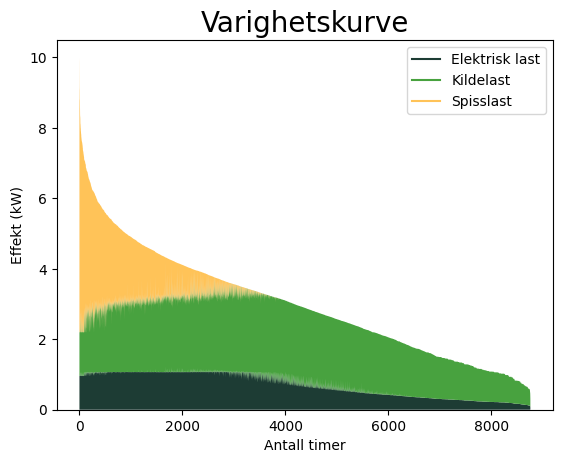

In [9]:
alle_laster = np.stack((ellast,kildelast,spisslast, ellast+kildelast+spisslast),axis=1)
alle_laster = alle_laster[alle_laster[:,3].argsort()[::-1]]


plt.plot([], [], color='#1d3c34', label ='Elektrisk last')
plt.plot([], [], color='#48a23f', label ='Kildelast')
plt.plot([], [], color='#FFC358', label ='Spisslast')
plt.stackplot(timer,alle_laster[:,0]/1000,alle_laster[:,1]/1000,alle_laster[:,2]/1000,colors = ['#1d3c34','#48a23f','#FFC358'])

plt.xlabel('Antall timer')
plt.ylabel('Effekt (kW)')
plt.title('Varighetskurve', fontsize = 20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


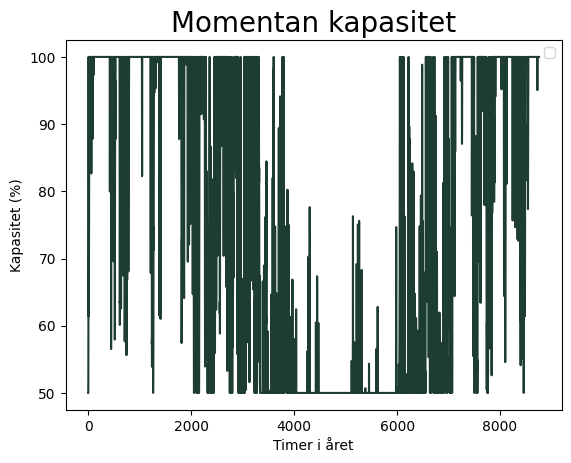

In [10]:

kap_dag = np.zeros(len(kap))
indeks = 0

for i in range(0,len(kap_dag),24):
    kap_dag[i:i+24] = np.sum(kap[indeks:indeks+24])/24
    indeks = indeks+24

plt.plot(kap,color = '#1d3c34')
#plt.plot(kap_dag,color = '#48a23f')
plt.xlabel('Timer i året')
plt.ylabel('Kapasitet (%)')
plt.title('Momentan kapasitet', fontsize = 20)
plt.legend()
plt.show()

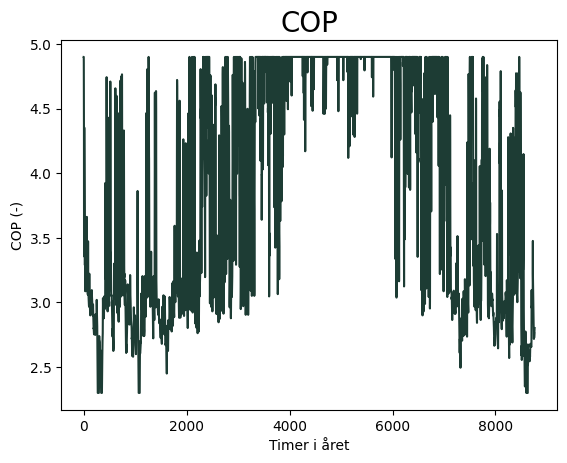

In [11]:
plt.plot(timer,cop,color = '#1d3c34')
plt.xlabel('Timer i året')
plt.ylabel('COP (-)')
plt.title('COP', fontsize = 20)
#plt.legend()
plt.show()

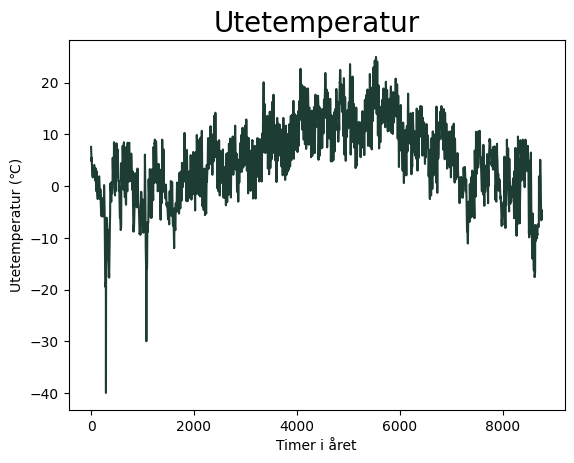

In [12]:
plt.plot(timer,utetemp,color = '#1d3c34')
plt.xlabel('Timer i året')
plt.ylabel('Utetemperatur (\u2103)')
plt.title('Utetemperatur', fontsize = 20)
#plt.legend()
plt.show()